1.Download the dataset

In [33]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df= pd.read_csv("dataframe_.csv")
df.head(5)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


2.Analysis of Data

In [4]:
df.shape

(1697, 2)

In [5]:
df.columns

Index(['input', 'output'], dtype='object')

In [6]:
df.dtypes

input     float64
output    float64
dtype: object

In [7]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [9]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [10]:
df.dropna(inplace=True)

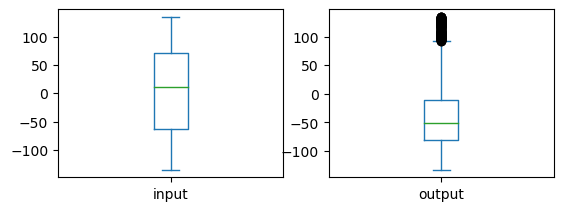

In [11]:
...
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

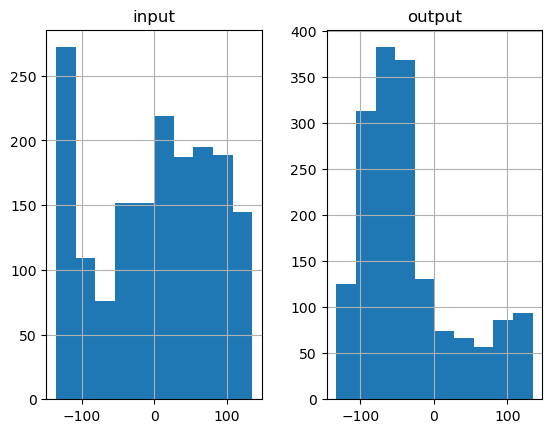

In [12]:
# histograms
df.hist()
plt.show()

3.Building a Model

In [13]:
X=df['input'].values.reshape((-1,1))
y=df['output'].values.reshape((-1,1))

In [14]:
#ML Model

import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import utils


In [15]:
lab=preprocessing.LabelEncoder()
y_transformed=lab.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_transformed,test_size=0.2,
                                                 random_state=42)

LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train)



LogisticRegression()

In [18]:
y_pred=logr.predict(X_test)

In [19]:
y_pred

array([230, 582, 582, 837, 837, 837, 230, 230, 582, 582, 230, 837, 837,
       230, 230, 230, 960, 583, 837, 837, 582, 960, 230, 583, 582, 230,
       960, 582, 837, 230, 960, 230, 230, 960, 230, 230, 837, 582, 837,
       230, 230, 960, 230, 960, 230, 230, 230, 960, 230, 583, 583, 230,
       960, 837, 230, 230, 230, 230, 230, 960, 230, 230, 230, 837, 230,
       960, 230, 960, 230, 837, 230, 837, 837, 583, 230, 583, 230, 837,
       837, 230, 230, 960, 837, 230, 582, 960, 230, 960, 837, 582, 582,
       230, 582, 230, 960, 837, 960, 837, 230, 230, 230, 230, 230, 230,
       230, 837, 230, 230, 960, 837, 230, 837, 960, 837, 230, 582, 230,
       230, 230, 583, 230, 960, 837, 960, 837, 960, 960, 837, 837, 230,
       960, 960, 230, 960, 230, 230, 230, 837, 583, 582, 230, 230, 230,
       230, 230, 582, 837, 837, 960, 230, 230, 583, 837, 230, 837, 582,
       230, 230, 837, 582, 583, 837, 230, 837, 230, 960, 960, 837, 837,
       837, 230, 837, 837, 837, 230, 230, 230, 582, 583, 582, 23

RANDOM FOREST CLASSIFIER

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:

clf = RandomForestClassifier(n_estimators = 100)  

In [22]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
y_pred=clf.predict(X_test)

In [24]:
y_pred

array([104, 422, 385, 896, 620, 834, 334,  33, 646, 504,  94, 957, 701,
       267, 370, 340, 280, 488, 756, 839, 160, 168, 266, 489, 160, 104,
        79, 279, 750, 383, 122, 643, 143,  83, 142, 573, 675, 450, 769,
       371, 540, 923, 708, 109, 248, 249, 236, 109, 128, 539, 440, 363,
       184, 862, 170,  53, 498, 208, 270, 240, 371, 511, 256, 674,  18,
       403, 116, 117, 414, 787, 556, 650, 957, 397, 372, 531, 600, 957,
       703, 109, 630, 269, 759, 143, 534, 139, 153, 132, 672, 580, 496,
       247, 450,  19, 960, 632, 927, 736, 248, 451, 230, 326, 253, 230,
       327, 794,  81, 120, 285, 427, 230, 761, 111, 734, 230, 466, 186,
       342,  81,  82,  57, 387, 759, 923, 862, 960, 369, 837, 844, 647,
       294, 401, 138, 255,  45, 426, 277, 703, 497, 440, 545, 589, 230,
       248, 123, 440, 837, 670,  50, 428,  18, 408, 944, 109, 671, 593,
       143, 444, 393, 592, 310, 964, 573, 775, 407,  15, 204, 756, 863,
       936, 334, 834, 764, 777, 230, 367, 537, 356, 515, 534, 48

SVM

In [25]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear')

In [26]:
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [27]:
y_pred=clf.predict(X_test)

In [28]:
y_pred

array([326, 582, 582, 896, 676, 851, 109, 109, 583, 583, 230, 957, 889,
       326, 582, 109,   9, 255, 730, 851, 582, 168, 582, 255, 582, 326,
        41, 582, 650, 722, 255, 486, 109, 255, 594, 664, 695, 582, 748,
       617, 326, 934, 338,  63, 109, 326, 338,  63, 109, 255, 255, 326,
        41, 896, 428, 230, 484, 109, 326, 460, 617, 428, 326, 777, 326,
       255, 109, 255, 109, 820, 326, 650, 957, 255, 326, 255, 428, 957,
       640, 109, 684, 255, 759, 109, 582,  36, 230,  41, 679, 582, 582,
       326, 582,  81, 960, 734,  41, 736, 109, 326, 230, 326, 109, 230,
       109, 794, 230, 109,  63, 621, 230, 660, 960, 640, 230, 583, 326,
       582, 230, 255, 326, 255, 759, 934, 896, 960, 255, 837, 820, 697,
       255, 960, 326, 255, 109, 109, 109, 640, 255, 582, 639, 326, 109,
       326, 326, 582, 851, 660,  96, 428, 326, 255, 953, 109, 738, 582,
       109, 326, 734, 582, 255, 964, 664, 691, 664,  22,  63, 773, 863,
       953, 109, 851, 759, 734, 230, 109, 428, 582, 255, 582, 42

In [31]:
# initialize list of lists
m = [['logistic regressiong', 0.01764705882352941], ['SVC',0.04411764705882353]]
  
# Create the pandas DataFrame
m = pd.DataFrame(m, columns=['model', 'accuracy'])
  
# print dataframe.
m

,model,accuracy
0,logistic regressiong,0.017647
1,SVC,0.044118


In [ ]:
step 6

In [35]:
import sklearn.metrics as metrics
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred =lr.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
# Printing the Results
print("Results of Errors:")
print(" MSE:", mse)
print(" R-Squared:", r2)
print('\n')
print("Values of Model Parameters:")
print(" Coefficient", lr.coef_)
print(" Intercept:", lr.intercept_)

Results of Errors:
 MSE: 64620.94535430326
 R-Squared: 0.16079455618713523


Values of Model Parameters:
 Coefficient [1.78618809]
 Intercept: 446.9593760635914
